In [1]:
import itertools as ls
import numpy as np

In [2]:
# проверяем каждую комбинацию на тотальность (всюду однозначность)
def setTotalProperty(relations):
    total=[]
    for relation in relations:
        dimensions = np.ndim(relation)
        if(dimensions == 1 and (len(firstSet)>1)):
            total.append(False)
        else:
            hasRel= False
            for inputArr in firstSet:
                hasRel= False
                for rel in relation:
                    if(inputArr == rel[0]):
                        hasRel = True
                        break
                if(not hasRel):
                    total.append(False)
                    break
            if(hasRel):
                total.append(True)
    return total

In [3]:
# проверяем каждую комбинацию на однозначность 
def setUnivalentProperty(relations):
    univalent=[]
    for relation in relations:
        dimensions = np.ndim(relation)
        if(dimensions == 1 and (len(firstSet)>1)):
            univalent.append(True)
        else:
            relCount = 0
            for inputArr in firstSet:
                relCount = 0
                for rel in relation:
                    if(inputArr == rel[0]):
                        relCount += 1
                if(relCount > 1):
                    univalent.append(False)
                    break
            if(relCount <= 1):
                univalent.append(True)
    return univalent

In [4]:
# проверяем каждую комбинацию на инъективность
def setInjectiveProperty(relations):
    injective=[]
    for relation in relations:
        dimensions = np.ndim(relation)
        if(dimensions == 1 and (len(secondSet)>1)):
            injective.append(True)
        else:
            relCount = 0
            for inputArr in secondSet:
                relCount = 0
                for rel in relation:
                    if(inputArr == rel[1]):
                        relCount += 1
                if(relCount > 1):
                    injective.append(False)
                    break
            if(relCount <= 1):
                injective.append(True)
    return injective 

In [5]:
# проверяем каждую комбинацию на сюръективность
def setSurjectiveProperty(relations):
    surjective=[]
    for relation in relations:
        dimensions = np.ndim(relation)
        if(dimensions == 1 and (len(secondSet)>1)):
            surjective.append(False)
        else:
            hasRel= False
            for inputArr in secondSet:
                hasRel= False
                for rel in relation:
                    if(inputArr == rel[1]):
                        hasRel = True
                        break
                if(not hasRel):
                    surjective.append(False)
                    break
            if(hasRel):
                surjective.append(True)
    return surjective

In [6]:
def setSummary(allRelation):
    total = setTotalProperty(allRelation)
    univalent = setUnivalentProperty(allRelation)
    injective = setInjectiveProperty(allRelation)
    surjective = setSurjectiveProperty(allRelation)
    return {'total':total, 'univalent':univalent, 'injective':injective, 'surjective':surjective}

In [7]:
def calculateRelations(isUnivalent, isTotal, isInjective, isSurjective, index):
    summary = setSummary(allRelation)
    resultCombi = []
    resultCount = 0
    for i in range(len(allRelation)):
        isBijection = False
        if(summary['total'][i] == isTotal and summary['univalent'][i] == isUnivalent and summary['injective'][i] == isInjective and summary['surjective'][i] == isSurjective):
            resultCount += 1
            resultCombi.append(allRelation[i])
    combinations[index] += (resultCount,)
    resultArray.append(resultCombi)

def setResultTable(allRelation):
    for idx, val in enumerate(combinations):
        calculateRelations(val[0], val[1], val[2], val[3], idx)

In [66]:
# firstSet = ['a','b', 'c', 'd', 'e']
firstSet = ['a','b', 'c']
# secondSet = firstSet
secondSet = ['d', 'e', 'f']
productSet = list(ls.product(firstSet, secondSet))# записываем все возможные отношения множеств (полный граф)
print(len(productSet))
allRelation = []
for i in range(2, len(productSet) + 1):
    allRelation.extend(list(ls.combinations(productSet, i))) # считаем все возможные комбинации отношений (формула сочетаний)

allRelation = a + allRelation
print(len(allRelation))
combinations = [] # итоговая таблица с количеством 
resultArray = [] # отношения которые игали в подсчете (если понадобится нарисовать, проверить)
combinations = list(ls.product([0, 1], repeat=4)) # все комбинации свойств - 16

setResultTable(allRelation)

9
511


In [63]:
from tabulate import tabulate

print('Первое множество: ', firstSet)
print('Второе множество: ', secondSet)
print(tabulate(combinations,headers=['U', 'T', 'I', 'S', 'Count'],showindex="always",tablefmt="grid"))

Первое множество:  ['a', 'b', 'c']
Второе множество:  ['d', 'e', 'f']
+----+-----+-----+-----+-----+---------+
|    |   U |   T |   I |   S |   Count |
+====+=====+=====+=====+=====+=========+
|  0 |   0 |   0 |   0 |   0 |      45 |
+----+-----+-----+-----+-----+---------+
|  1 |   0 |   0 |   0 |   1 |      57 |
+----+-----+-----+-----+-----+---------+
|  2 |   0 |   0 |   1 |   0 |       9 |
+----+-----+-----+-----+-----+---------+
|  3 |   0 |   0 |   1 |   1 |      21 |
+----+-----+-----+-----+-----+---------+
|  4 |   0 |   1 |   0 |   0 |      57 |
+----+-----+-----+-----+-----+---------+
|  5 |   0 |   1 |   0 |   1 |     259 |
+----+-----+-----+-----+-----+---------+
|  6 |   0 |   1 |   1 |   0 |       0 |
+----+-----+-----+-----+-----+---------+
|  7 |   0 |   1 |   1 |   1 |       0 |
+----+-----+-----+-----+-----+---------+
|  8 |   1 |   0 |   0 |   0 |       9 |
+----+-----+-----+-----+-----+---------+
|  9 |   1 |   0 |   0 |   1 |       0 |
+----+-----+-----+-----+----

In [64]:
print('Все возможные отношения:')
# for i in enumerate(resultArray):
#     print(i)
# print(resultArray[3])
# print(len(resultArray[3]))

# print(resultArray[8])
resultArray[10]

Все возможные отношения:


[('a', 'd'),
 ('a', 'e'),
 ('a', 'f'),
 ('b', 'd'),
 ('b', 'e'),
 ('b', 'f'),
 ('c', 'd'),
 ('c', 'e'),
 ('c', 'f'),
 (('a', 'd'), ('b', 'e')),
 (('a', 'd'), ('b', 'f')),
 (('a', 'd'), ('c', 'e')),
 (('a', 'd'), ('c', 'f')),
 (('a', 'e'), ('b', 'd')),
 (('a', 'e'), ('b', 'f')),
 (('a', 'e'), ('c', 'd')),
 (('a', 'e'), ('c', 'f')),
 (('a', 'f'), ('b', 'd')),
 (('a', 'f'), ('b', 'e')),
 (('a', 'f'), ('c', 'd')),
 (('a', 'f'), ('c', 'e')),
 (('b', 'd'), ('c', 'e')),
 (('b', 'd'), ('c', 'f')),
 (('b', 'e'), ('c', 'd')),
 (('b', 'e'), ('c', 'f')),
 (('b', 'f'), ('c', 'd')),
 (('b', 'f'), ('c', 'e'))]

(('a', 'd'), ('a', 'e'), ('b', 'd'), ('c', 'd'))


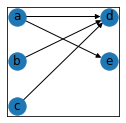

(('a', 'd'), ('a', 'e'), ('b', 'd'), ('c', 'e'))


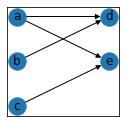

(('a', 'd'), ('a', 'e'), ('b', 'e'), ('c', 'd'))


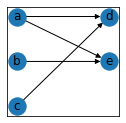

(('a', 'd'), ('a', 'e'), ('b', 'e'), ('c', 'e'))


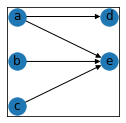

(('a', 'd'), ('a', 'f'), ('b', 'd'), ('c', 'd'))


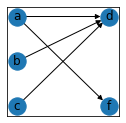

(('a', 'd'), ('a', 'f'), ('b', 'd'), ('c', 'f'))


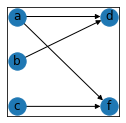

(('a', 'd'), ('a', 'f'), ('b', 'f'), ('c', 'd'))


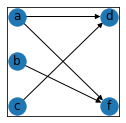

(('a', 'd'), ('a', 'f'), ('b', 'f'), ('c', 'f'))


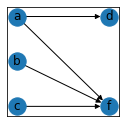

(('a', 'd'), ('b', 'd'), ('b', 'e'), ('c', 'd'))


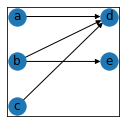

(('a', 'd'), ('b', 'd'), ('b', 'e'), ('c', 'e'))


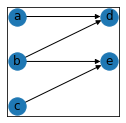

(('a', 'd'), ('b', 'd'), ('b', 'f'), ('c', 'd'))


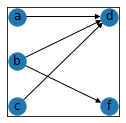

(('a', 'd'), ('b', 'd'), ('b', 'f'), ('c', 'f'))


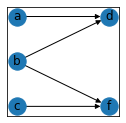

(('a', 'd'), ('b', 'd'), ('c', 'd'), ('c', 'e'))


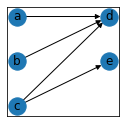

(('a', 'd'), ('b', 'd'), ('c', 'd'), ('c', 'f'))


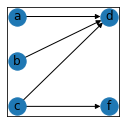

(('a', 'd'), ('b', 'e'), ('c', 'd'), ('c', 'e'))


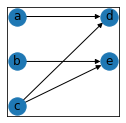

(('a', 'd'), ('b', 'f'), ('c', 'd'), ('c', 'f'))


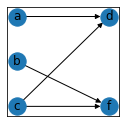

(('a', 'e'), ('a', 'f'), ('b', 'e'), ('c', 'e'))


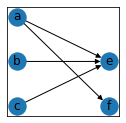

(('a', 'e'), ('a', 'f'), ('b', 'e'), ('c', 'f'))


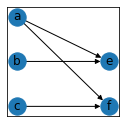

(('a', 'e'), ('a', 'f'), ('b', 'f'), ('c', 'e'))


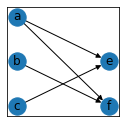

(('a', 'e'), ('a', 'f'), ('b', 'f'), ('c', 'f'))


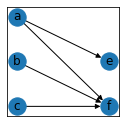

(('a', 'e'), ('b', 'd'), ('b', 'e'), ('c', 'd'))


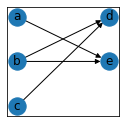

(('a', 'e'), ('b', 'd'), ('b', 'e'), ('c', 'e'))


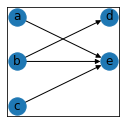

(('a', 'e'), ('b', 'd'), ('c', 'd'), ('c', 'e'))


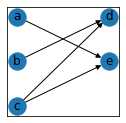

(('a', 'e'), ('b', 'e'), ('b', 'f'), ('c', 'e'))


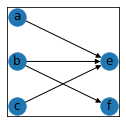

(('a', 'e'), ('b', 'e'), ('b', 'f'), ('c', 'f'))


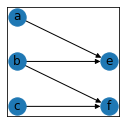

(('a', 'e'), ('b', 'e'), ('c', 'd'), ('c', 'e'))


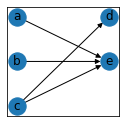

(('a', 'e'), ('b', 'e'), ('c', 'e'), ('c', 'f'))


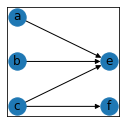

(('a', 'e'), ('b', 'f'), ('c', 'e'), ('c', 'f'))


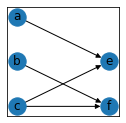

(('a', 'f'), ('b', 'd'), ('b', 'f'), ('c', 'd'))


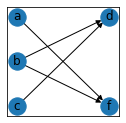

(('a', 'f'), ('b', 'd'), ('b', 'f'), ('c', 'f'))


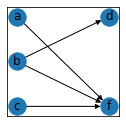

(('a', 'f'), ('b', 'd'), ('c', 'd'), ('c', 'f'))


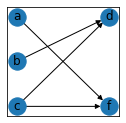

(('a', 'f'), ('b', 'e'), ('b', 'f'), ('c', 'e'))


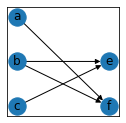

(('a', 'f'), ('b', 'e'), ('b', 'f'), ('c', 'f'))


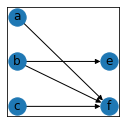

(('a', 'f'), ('b', 'e'), ('c', 'e'), ('c', 'f'))


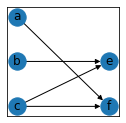

(('a', 'f'), ('b', 'f'), ('c', 'd'), ('c', 'f'))


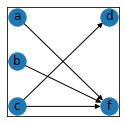

(('a', 'f'), ('b', 'f'), ('c', 'e'), ('c', 'f'))


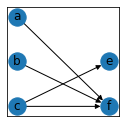

(('a', 'd'), ('a', 'e'), ('b', 'd'), ('b', 'e'), ('c', 'd'))


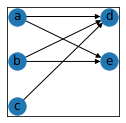

(('a', 'd'), ('a', 'e'), ('b', 'd'), ('b', 'e'), ('c', 'e'))


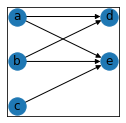

(('a', 'd'), ('a', 'e'), ('b', 'd'), ('c', 'd'), ('c', 'e'))


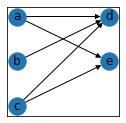

(('a', 'd'), ('a', 'e'), ('b', 'e'), ('c', 'd'), ('c', 'e'))


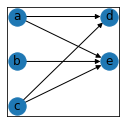

(('a', 'd'), ('a', 'f'), ('b', 'd'), ('b', 'f'), ('c', 'd'))


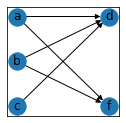

(('a', 'd'), ('a', 'f'), ('b', 'd'), ('b', 'f'), ('c', 'f'))


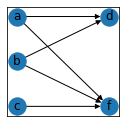

(('a', 'd'), ('a', 'f'), ('b', 'd'), ('c', 'd'), ('c', 'f'))


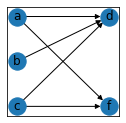

(('a', 'd'), ('a', 'f'), ('b', 'f'), ('c', 'd'), ('c', 'f'))


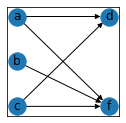

(('a', 'd'), ('b', 'd'), ('b', 'e'), ('c', 'd'), ('c', 'e'))


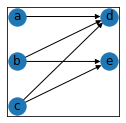

(('a', 'd'), ('b', 'd'), ('b', 'f'), ('c', 'd'), ('c', 'f'))


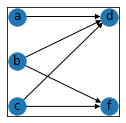

(('a', 'e'), ('a', 'f'), ('b', 'e'), ('b', 'f'), ('c', 'e'))


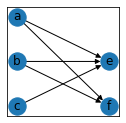

(('a', 'e'), ('a', 'f'), ('b', 'e'), ('b', 'f'), ('c', 'f'))


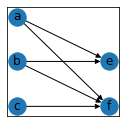

(('a', 'e'), ('a', 'f'), ('b', 'e'), ('c', 'e'), ('c', 'f'))


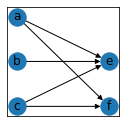

(('a', 'e'), ('a', 'f'), ('b', 'f'), ('c', 'e'), ('c', 'f'))


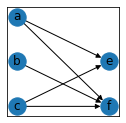

(('a', 'e'), ('b', 'd'), ('b', 'e'), ('c', 'd'), ('c', 'e'))


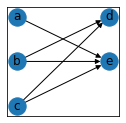

(('a', 'e'), ('b', 'e'), ('b', 'f'), ('c', 'e'), ('c', 'f'))


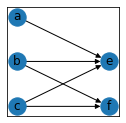

(('a', 'f'), ('b', 'd'), ('b', 'f'), ('c', 'd'), ('c', 'f'))


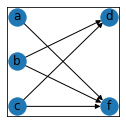

(('a', 'f'), ('b', 'e'), ('b', 'f'), ('c', 'e'), ('c', 'f'))


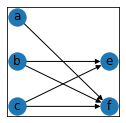

(('a', 'd'), ('a', 'e'), ('b', 'd'), ('b', 'e'), ('c', 'd'), ('c', 'e'))


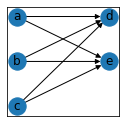

(('a', 'd'), ('a', 'f'), ('b', 'd'), ('b', 'f'), ('c', 'd'), ('c', 'f'))


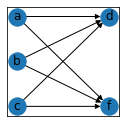

(('a', 'e'), ('a', 'f'), ('b', 'e'), ('b', 'f'), ('c', 'e'), ('c', 'f'))


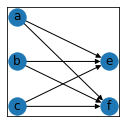

In [65]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.DiGraph()
pos = {'a':[0,2], 'b':[0,1], 'c':[0,0], 'd':[1,2], 'e':[1,1], 'f':[1,0], 'r':[0,3], 'z':[1,3], 'k':[0,4],'g':[1,4]}

for i in resultArray[4]:
    dimensions = np.ndim(i)
    if(dimensions == 1):
        i = (i,)
    G = nx.DiGraph()
    print(i)
    G.add_edges_from(i)
    plt.figure(figsize=(2,2))
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, arrows=True)
    
    plt.show()

# for i in resultArray[10]:
#     dimensions = np.ndim(i)
#     if(dimensions == 1):
#         i = (i,)
#     G = nx.DiGraph()
#     print(i)
#     G.add_edges_from(i)
#     plt.figure(figsize=(2,2))
#     nx.draw_networkx_nodes(G, pos)
#     nx.draw_networkx_labels(G, pos)
#     nx.draw_networkx_edges(G, pos, arrows=True)
    
#     plt.show()